In [6]:
import numpy as np
import random
from IPython.display import Markdown,display # Needed for the Markdown
import matplotlib.pyplot as plt
from tabulate import tabulate
import math
import pandas as pd

numTrials = 5

def stuffEnvelopes(numLetters):
    letters = []
    for i in range(numLetters):
        letters.append(i)
    random.shuffle(letters)
    counter = 0
    for i in range(len(letters)):
        if letters[i] == i:
            counter += 1
    return(counter)
table = []
for k in [0,1,2,3,4,5,6]:
        pk = math.exp(-1) / math.factorial(k)
        for numEnvelopes in [5,10,100,1000,10000]:
            counter = 0
            for _ in range(100):
                tot = stuffEnvelopes(numEnvelopes)
                if tot == k:
                     counter += 1
            nk = counter/100
            diff = abs(pk - nk)
            table.append([numEnvelopes,k,nk, pk, diff])
df = pd.DataFrame(table, columns=["numEnvelopes", "k", "nk (Experimental)", "pk (Poisson)", "|pk - nk|"])

# Display the table
styled_df = df.style.set_caption("Comparison of Experimental and Poisson Values")
styled_df
        
        



,numEnvelopes,k,nk (Experimental),pk (Poisson),|pk - nk|
0,5,0,0.330000,0.367879,0.037879
1,10,0,0.320000,0.367879,0.047879
2,100,0,0.400000,0.367879,0.032121
3,1000,0,0.410000,0.367879,0.042121
4,10000,0,0.470000,0.367879,0.102121
5,5,1,0.340000,0.367879,0.027879
6,10,1,0.310000,0.367879,0.057879
7,100,1,0.330000,0.367879,0.037879
8,1000,1,0.360000,0.367879,0.007879
9,10000,1,0.410000,0.367879,0.042121


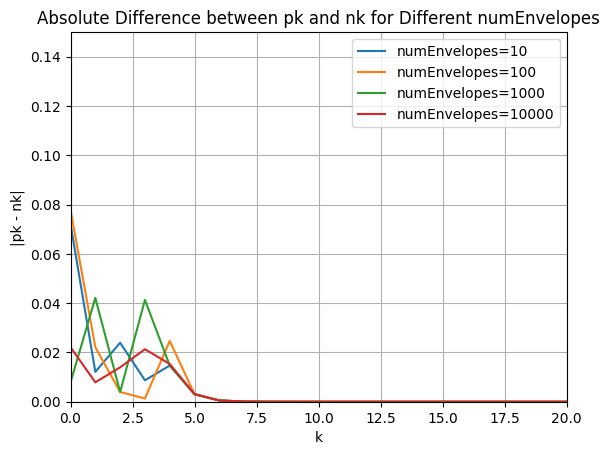

In [34]:
import numpy as np
import random
from IPython.display import Markdown,display # Needed for the Markdown
import matplotlib.pyplot as plt
from tabulate import tabulate
import math

numTrials = 5

def stuffEnvelopes(numLetters):
    letters = []
    for i in range(numLetters):
        letters.append(i)
    random.shuffle(letters)
    counter = 0
    for i in range(len(letters)):
        if letters[i] == i:
            counter += 1
    return(counter)

numEnvelopesList = [10,100,1000,10000]
k_list = list(range(21))
for numEnvelopes in numEnvelopesList:
    differences = []  
    for k in k_list:
        pk = math.exp(-1) / math.factorial(k)  # Theoretical probability pk
        counter = 0
        for _ in range(100):
            if stuffEnvelopes(numEnvelopes) == k:
                counter += 1
        nk = counter / 100  
        diff = abs(pk - nk)
        differences.append(diff)

    
    plt.plot(k_list, differences, label=f'numEnvelopes={numEnvelopes}')


plt.title('Absolute Difference between pk and nk for Different numEnvelopes')
plt.xlabel('k')
plt.ylabel('|pk - nk|')
plt.legend()
plt.grid()
plt.xlim(0, 20)  
plt.ylim(0, 0.15)  
plt.show()